In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [9]:
n = float(input("Enter a number: "))

Enter a number: 1


In [10]:
print("n:",n)

n: 1.0


In [11]:
import random
import time

length_perceived = []
length_actual = []

In [28]:
# random.uniform(a, b)
#  Return a random floating point number N such that 
#    a <= N <= b for a <= b and b <= N <= a for b < a.
#  The end-point value b may or may not be included in the range depending
#   on floating-point rounding in the equation a + (b-a) * random().

a = 0.01
b = 0.1
N = random.uniform(a,b)

In [28]:
print("N:", N)

N: 0.012968116931447775


<Container object of 3 artists>

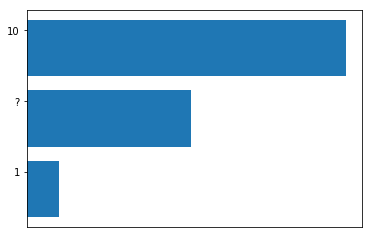

In [29]:
plt.gca().set_frame_on(True)
plt.gca().get_xaxis().set_visible(False)
plt.yticks(np.arange(3)+0.25, ('1', '?', '10'))

plt.barh(np.arange(3), (a,N,b))

In [30]:
# (3) guess the length of the random length bar
guess = eval(input("Guess the length of the middle bar: "))

# save the actual length, and the guess in corresponding arrays
length_actual.append(N*100.0)
length_perceived.append(guess)

Guess the length of the middle bar: 5


In [31]:
print(length_actual)
print(length_perceived)

[4.32865382967163, 6.253204512670485, 1.4465131472821495, 2.1675175520448375, 5.146071773715381]
[4.5, 6, 1.3, 2.1, 5]


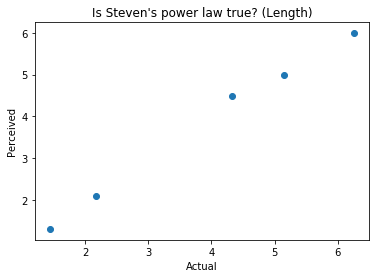

In [32]:
plt.title("Is Steven's power law true? (Length)")
plt.xlabel("Actual")
plt.ylabel("Perceived")
plt.scatter(length_actual, length_perceived)

In [34]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.power(x, b) + c

x = np.arange(20)  # [0,1,2,3, ..., 19]
y = np.power(x, 2) # [0,1,4,9, ... ]

popt, pcov = curve_fit(func, x, y)
print('{:.2f} x^{:.2f} + {:.2f}'.format(*popt))

1.00 x^2.00 + -0.00


In [35]:
popt, pcov = curve_fit(func, length_actual, length_perceived)
print('{:.2f} x^{:.2f} + {:.2f}'.format(*popt))

2.58 x^0.61 + -1.98


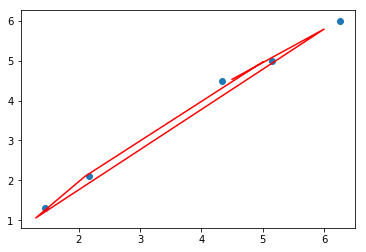

In [40]:
plt.scatter(length_actual, length_perceived)
plt.plot(length_perceived, func(length_perceived, *popt), 'r-', label='fit')

In [41]:
import pandas as pd

In [42]:
df = pd.DataFrame(columns=['actual','perceived'])

In [43]:
df.actual = length_actual
df.perceived = length_perceived

In [44]:
df

,actual,perceived
0,4.328654,4.5
1,6.253205,6.0
2,1.446513,1.3
3,2.167518,2.1
4,5.146072,5.0


In [45]:
dfs = df.sort_values(by='actual')

In [46]:
dfs

,actual,perceived
2,1.446513,1.3
3,2.167518,2.1
0,4.328654,4.5
4,5.146072,5.0
1,6.253205,6.0


In [54]:
sorted_actual = dfs.actual.values
sorted_perceived = dfs.perceived.values

In [55]:
print("actual:",sorted_actual)
print("perceived:", sorted_perceived)

actual: [ 1.44651315  2.16751755  4.32865383  5.14607177  6.25320451]
perceived: [ 1.3  2.1  4.5  5.   6. ]


In [56]:
popt, pcov = curve_fit(func, sorted_actual, sorted_perceived)
print('{:.2f} x^{:.2f} + {:.2f}'.format(*popt))

2.58 x^0.61 + -1.98


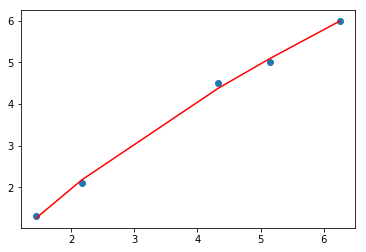

In [57]:
plt.scatter(sorted_actual, sorted_perceived)
plt.plot(sorted_actual, func(sorted_actual, *popt), 'r-', label='fit')